In [14]:
from scripts.navigation import Indoor_Navigation
import cv2
import matplotlib.pyplot as plt

In [2]:
navigation = Indoor_Navigation('assets/images/floor_plan_1.jpg',
                                'Simple Floor Plan',
                                debug=False)
navigation.process_image()

Overall Progress:   0%|          | 0/4 [00:00<?, ?task/s]

Overall Progress:  50%|█████     | 2/4 [00:00<00:00, 44.05task/s]

Initial image process...
Detecting walls...
Detecting doors...

image 1/1 /tmp/tmpevf8gazt.png: 2016x2016 1 DOOR-DOUBLE, 7 DOOR-SINGLEs, 1 ELEVATOR, 1 MEETING-TABLE, 4 PRIVATE-DESKs, 1 SINK, 3 STORAGEs, 1 TOILET, 3 WASHBASINs, 7719.3ms
Speed: 40.6ms preprocess, 7719.3ms inference, 2.7ms postprocess per image at shape (1, 3, 2016, 2016)


Overall Progress:  75%|███████▌  | 3/4 [00:08<00:02,  2.91s/task]

Creating Graph...


Overall Progress: 100%|██████████| 4/4 [00:29<00:00,  7.40s/task]


In [4]:
navigation = Indoor_Navigation('assets/images/PC_lab.png',
                                'PC Lab Floor Plan',
                                debug=False)
navigation.process_image(grid_size=200)

Overall Progress:  25%|██▌       | 1/4 [00:00<00:00,  9.12task/s]

Initial image process...
Detecting walls...


Overall Progress:  50%|█████     | 2/4 [00:00<00:00,  6.68task/s]

Detecting doors...

image 1/1 /tmp/tmpsaale1k9.png: 2016x1632 8 DOOR-SINGLEs, 4 LOUNGEs, 1 PRIVATE-DESK, 1 SINK, 6 STAIRSs, 2 WASHBASINs, 11 WINDOWs, 3388.8ms
Speed: 21.6ms preprocess, 3388.8ms inference, 1.9ms postprocess per image at shape (1, 3, 2016, 1632)


Overall Progress:  75%|███████▌  | 3/4 [00:04<00:02,  2.21s/task]

Creating Graph...
Contour Filtering Done


Overall Progress: 100%|██████████| 4/4 [00:06<00:00,  1.66s/task]


In [17]:
navigation = Indoor_Navigation('assets/images/PC_lab-isogeio.png',
                                'Fancy Hospital',
                                debug=False)
navigation.calibrate(0.00148)
navigation.process_image(grid_size=150)

                                                         
                                                         
                                                         
Overall Progress:   0%|          | 0/4 [00:21<?, ?task/s]        

Initial image process...
Detecting walls...
Detecting doors...

image 1/1 /tmp/tmprlh1_le4.png: 2016x1504 1 DOOR-DOUBLE, 10 DOOR-SINGLEs, 2 PRIVATE-DESKs, 4 SINKs, 16 STAIRSs, 2 TOILETs, 2 WASHBASINs, 13 WINDOWs, 3261.2ms
Speed: 31.1ms preprocess, 3261.2ms inference, 9.5ms postprocess per image at shape (1, 3, 2016, 1504)


                                                         
Overall Progress:   0%|          | 0/4 [00:25<?, ?task/s]        

Creating Graph...
Contour Filtering Done


Overall Progress: 100%|██████████| 4/4 [00:04<00:00,  1.16s/task]


In [3]:
navigation = Indoor_Navigation('assets/images/hospital_1.jpg',
                                'Fancy Hospital',
                                debug=False)
navigation.calibrate(0.00148)
navigation.process_image(grid_size=150)

Overall Progress:  25%|██▌       | 1/4 [00:00<00:00,  6.58task/s]

Initial image process...
Detecting walls...


Overall Progress:  50%|█████     | 2/4 [00:00<00:00,  6.81task/s]

Detecting doors...

image 1/1 /tmp/tmpge0yj8l3.png: 1824x2016 2 CANTINEs, 3 DOOR-DOUBLEs, 78 DOOR-SINGLEs, 4 HIGH-TABLEs, 5 LOUNGEs, 1 MEETING-TABLE, 3 PLANTSs, 2 PRIVATE-DESKs, 2 REST-FOR-2s, 1 STAIRS, 21 TOILETs, 10 WASHBASINs, 1 WINDOW, 3757.7ms
Speed: 111.9ms preprocess, 3757.7ms inference, 3.4ms postprocess per image at shape (1, 3, 1824, 2016)


Overall Progress:  75%|███████▌  | 3/4 [00:05<00:02,  2.31s/task]

Creating Graph...
Contour Filtering Done


Overall Progress: 100%|██████████| 4/4 [00:07<00:00,  1.75s/task]


In [15]:
navigation = Indoor_Navigation.load('navigation-instances/admin_ui_test.pkl')
# navigation.get_json(save_path='test.json')

In [4]:
navigation.save('navigation-instances/hospital_1.pkl')
navigation = Indoor_Navigation.load('navigation-instances/hospital_1.pkl')

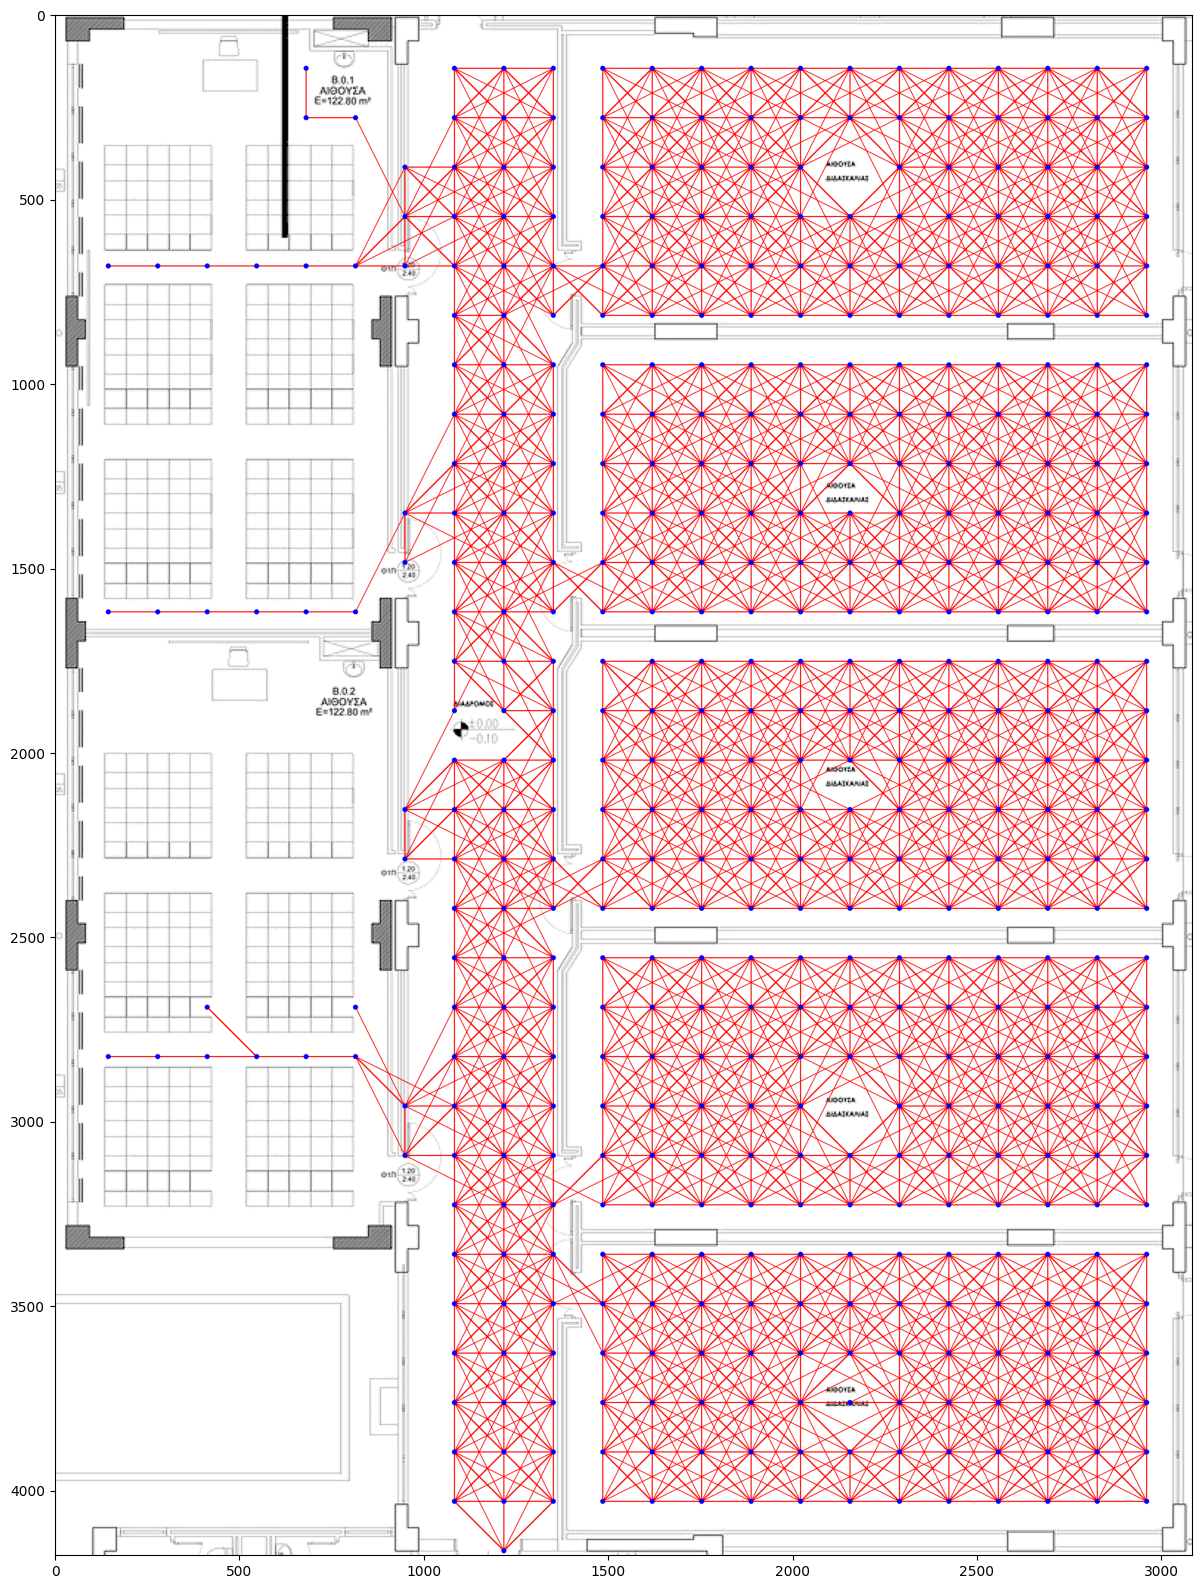

In [16]:
# plot graph
image = navigation.image_upscale.copy()
graph = navigation.graph

# image to rgb
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# draw edges
for i, j in graph.edges:
    cv2.line(image, navigation.graph_nodes[i], navigation.graph_nodes[j], (255, 0, 0), 2)
# draw nodes
for node in navigation.graph_nodes:
    cv2.circle(image, node, 7, (0, 0, 255), -1)

plt.figure(figsize=(20, 20))
plt.imshow(image)
plt.show()

In [13]:
navigation.calibrate(100)

In [9]:
navigation.calculate_and_route(start=(0.8, 0.1),
                                    end=(0.7, 0.9),
                                    algorithm='dijkstra',
                                    in_pixels=False,
                                    simplify_route=True)

AttributeError: 'Indoor_Navigation' object has no attribute 'calculate_and_route'

Start point connected to the path
End point --NOT-- connected to the path


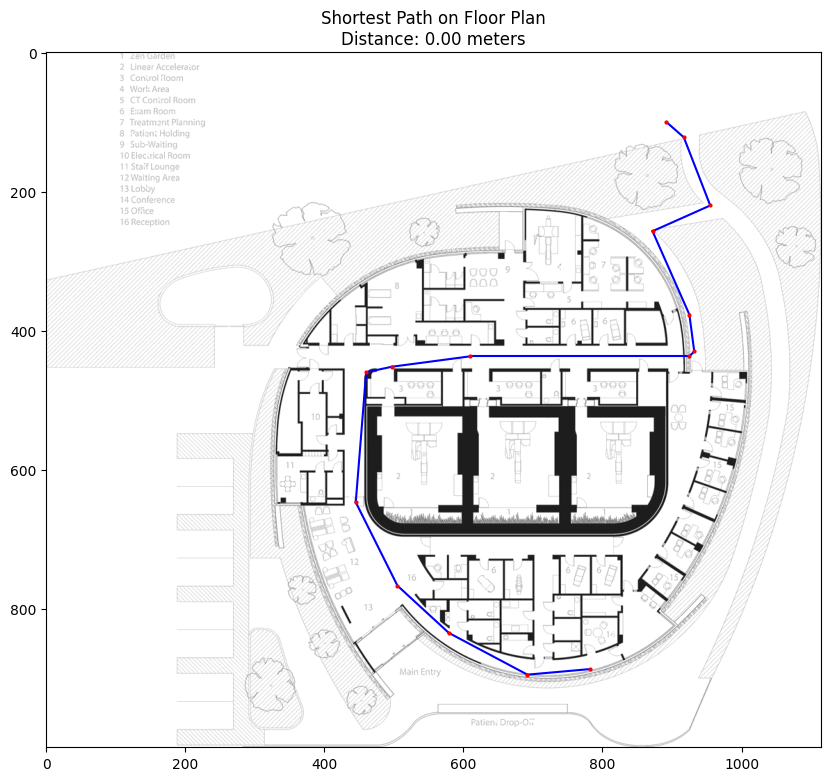

In [12]:
plt.figure(figsize=(10, 10))
navigation.calculate_and_plot_route(start=(0.8, 0.1),
                                    end=(0.7, 0.9),
                                    algorithm='astar',
                                    in_pixels=False,
                                    simplify_route=True)

Number of rooms: 60


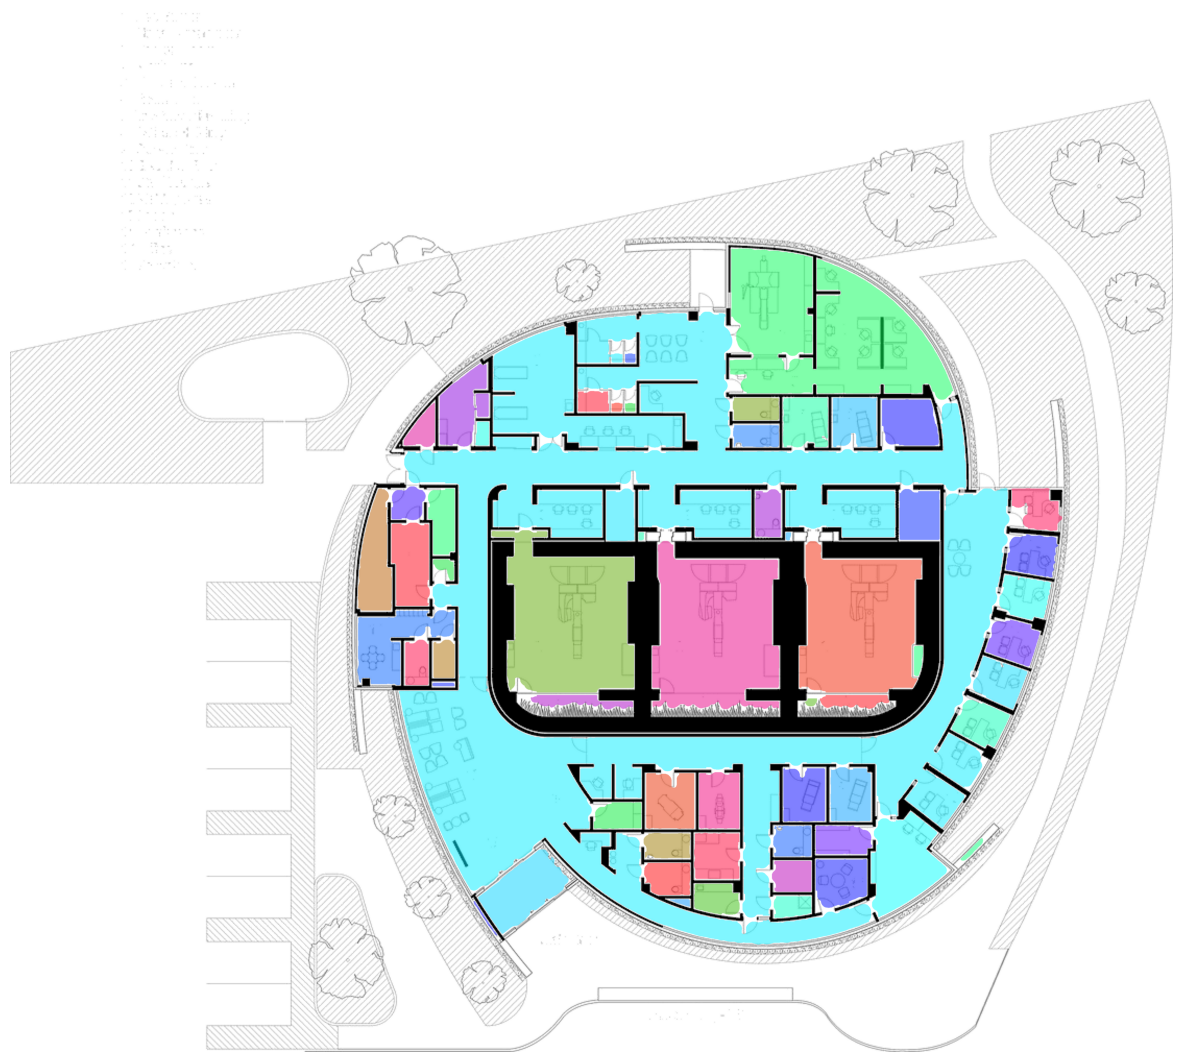

In [3]:
navigation.plot_image(navigation.image_upscale, with_rooms=True)

Number of rooms: 60


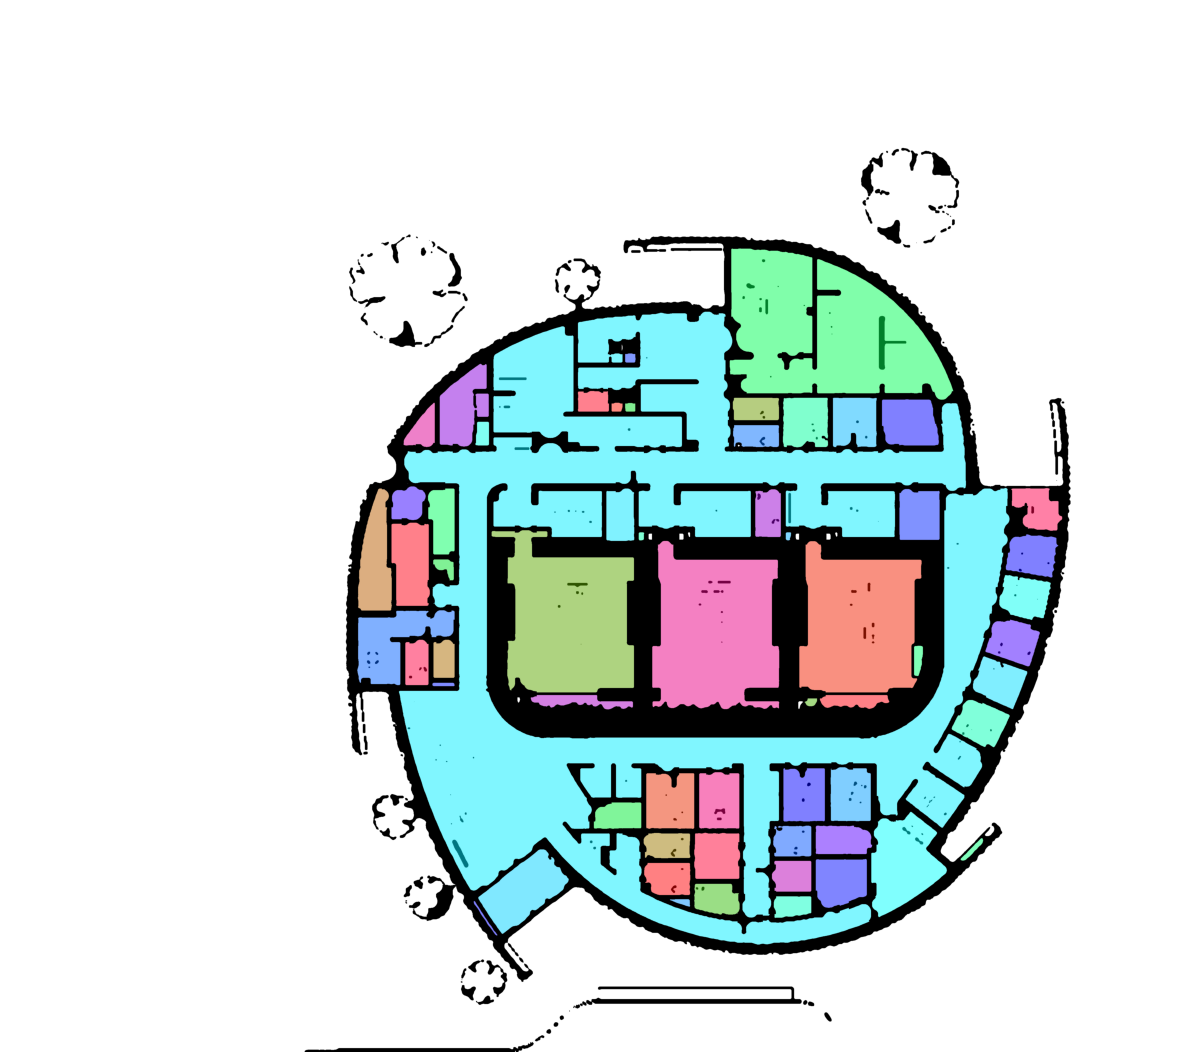

In [4]:
navigation.plot_image(navigation.walls_doors, with_rooms=True)

In [4]:
# navigation.plot_image(navigation.image_upscale,
#                       with_rooms=True,
#                       save_file='assets/images/hospital_1_rooms.jpg'
#                       )

In [5]:
# navigation.plot_image(navigation.image_upscale,
#                       with_rooms=False,
#                       save_file='assets/images/hospital_1_upscaled_sharpened.jpg'
#                       )